 <b>The best country to move to as a newly graduated software developer  </b>

 
Datasets 

- Indeed Software Engineer Job Dataset 
https://www.kaggle.com/datasets/samrat77/indeed-software-engineer-job-dataset 

- Healthy Lifestyle Cities Report 2021 
https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021 

- LinkedIn Software Engineering Jobs Dataset 
https://www.kaggle.com/datasets/asaniczka/software-engineer-job-postings-linkedin 

- Quality of Life for Each Country 
https://www.kaggle.com/datasets/ahmedmohamed2003/quality-of-life-for-each-country 

- Quality of Life Index by Country 
https://www.kaggle.com/datasets/marcelobatalhah/quality-of-life-index-by-country 
 

Articles 

https://www.linkedin.com/pulse/top-10-best-countries-software-engineers-2023-dannielle-seddon 
1. USA 
2. Canada 
3. Switzerland 

https://www.wearedevelopers.com/en/magazine/267/best-countries-for-software-engineers 
1. Canada 
2. Australia 
3. Sweden 

https://en.dev.bg/what-are-the-best-countries-for-software-engineers/ 
1. Canada 
2. Switzerland 
3. USA 

https://www.hackerearth.com/blog/developers/best-countries-software-engineers-developers-work-2017/ 
1. Switzerland 
2. Canada 
3. Australia 

https://www.geeksforgeeks.org/best-countries-for-software-engineers/ 
1. Switzerland 
2. USA 
3. UK 

https://medium.com/@analyticsinsight/best-countries-for-programming-jobs-4d264f37e001 
1. Switzerland 
2. USA 
3. UK 

https://rolespilot.com/blog/best-countries-for-software-engineers/ 
1. USA 
2. Switzerland 
3. Canada 

Asking CHATGPT 
https://chatgpt.com/c/67c8ab10-c968-8000-bd6b-928edde583c2 
1. Germany 
2. Canada 
3. USA 

Initial prediction  

1. Switzerland 
2. Canada 
3. USA 
 

In [505]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import pearsonr

<b>1.Theoretical Framework </b>

The goal of this project is to create an index that compares countries and identifies the best places for newly graduated software engineers or junior software engineers to move to. This topic was chosen because of the growing demand for software engineers worldwide and for my own personal reason as i want to emigrate once i graduate as a software engineer. It's important for new graduates to know what country will offer them the best opportunity for their career allowing them to develop professionally and the best country regarding living standards.  

This index will look at different factors such as salaries, cost of living, quality of life and job demand. These factors will have different levels of importance assigned to them with an overall combined score which will rank the countries on how good they would be to move to as a newly graduated software engineer. 

<b>2.Data Selection</b> 

In [506]:
file_path = 'globalJobs.csv'
jobsData = pd.read_csv(file_path)
print(jobsData.head())

       Country             Job Title                Category  Salary Currency  \
0  Afghanistan      Account Examiner  Accounting and Finance  501400      AFN   
1  Afghanistan     Account Executive  Accounting and Finance  890100      AFN   
2  Afghanistan            Accountant  Accounting and Finance  705500      AFN   
3  Afghanistan    Accounting Analyst  Accounting and Finance  810500      AFN   
4  Afghanistan  Accounting Assistant  Accounting and Finance  552400      AFN   

   Exchange Rate  Salary (USD)  
0      71.244429       7037.74  
1      71.244429      12493.61  
2      71.244429       9902.53  
3      71.244429      11376.33  
4      71.244429       7753.59  


In [507]:
file_path = 'Quality_of_Life.csv'
countryData = pd.read_csv(file_path)
print(countryData.head())

         country  Purchasing Power Value Purchasing Power Category  \
0    Afghanistan                   32.15                'Very Low'   
1  Aland Islands                  125.01               'Very High'   
2        Albania                   42.82                     'Low'   
3       Alderney                    0.00                       NaN   
4        Algeria                   27.60                'Very Low'   

   Safety Value Safety Category  Health Care Value Health Care Category  \
0         25.33           'Low'              24.24                'Low'   
1         71.81          'High'              79.72               'High'   
2         55.52      'Moderate'              48.21           'Moderate'   
3         83.79     'Very High'             100.00          'Very High'   
4         47.54      'Moderate'              54.43           'Moderate'   

   Climate Value Climate Category  Cost of Living Value  \
0           0.00              NaN                 21.08   
1         

<b>3.Imputation of missing data  </b>

In [508]:
print(jobsData.isnull().sum()) 

print(jobsData.describe())

Country          0
Job Title        0
Category         0
Salary           0
Currency         0
Exchange Rate    0
Salary (USD)     0
dtype: int64
             Salary  Exchange Rate  Salary (USD)
count  8.371250e+05  837125.000000  8.371250e+05
mean   8.454217e+06    1531.410036  4.092947e+04
std    4.866869e+07    7490.026552  2.645599e+05
min    2.020000e+03       0.307772  2.895000e+01
25%    3.964000e+04       1.000000  6.255010e+03
50%    1.432000e+05      10.803173  1.470430e+04
75%    1.621400e+06     177.942203  3.256619e+04
max    2.604000e+09   90879.938461  1.617476e+07


In [509]:
jobsData = jobsData[jobsData["Category"] == "Information Technology"]
print(jobsData["Category"].unique())

['Information Technology']


<h6>This will remove all the jobs that are not part of the Information Technology Category</h6>

In [510]:
jobsData = jobsData[~jobsData["Job Title"].str.contains("Manager", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Director", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Executive", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Chief Information Officer", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Supervisor", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Head of", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Administrator", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Infrastructure", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Coordinator", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Leader", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Trainer", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Administration", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Lead", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Associate", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Architect", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("President", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Expert", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Consultant", case=False, na=False)]


total_rows = jobsData.shape[0]
print(f"Total number of rows: {total_rows}")

Total number of rows: 39338


<h6>Check number of rows before and after your remove a job that is not suitable for a Junior Dev</h6>

In [511]:
jobsData_Clean = jobsData.drop(columns=["Salary","Currency","Exchange Rate","Category"])
jobsData_Clean.rename(columns={'Salary (USD)': 'Salary'}, inplace=True)
jobsData_Clean.rename(columns={'Job Title': 'Job_Title'}, inplace=True)

print(jobsData_Clean.head())

          Country                    Job_Title    Salary
2293  Afghanistan    2nd Line Systems Engineer  12893.64
2294  Afghanistan               ABAP Developer  11636.00
2295  Afghanistan  Advertising Account Planner  12139.90
2296  Afghanistan            Android Developer  13623.52
2297  Afghanistan            Angular Developer  12422.02


In [512]:
print(countryData.isnull().sum()) 

country                                0
Purchasing Power Value                 0
Purchasing Power Category             46
Safety Value                           0
Safety Category                        2
Health Care Value                      0
Health Care Category                  15
Climate Value                          0
Climate Category                     122
Cost of Living Value                   0
Cost of Living Category               45
Property Price to Income Value         0
Property Price to Income Category     21
Traffic Commute Time Value             0
Traffic Commute Time Category         29
Pollution Value                        0
Pollution Category                    10
Quality of Life Value                  0
Quality of Life Category             122
dtype: int64


In [513]:
CountryData_Clean = countryData.dropna(subset=['Quality of Life Category'])
print(CountryData_Clean.isnull().sum())
print(CountryData_Clean.info())

country                              0
Purchasing Power Value               0
Purchasing Power Category            0
Safety Value                         0
Safety Category                      0
Health Care Value                    0
Health Care Category                 0
Climate Value                        0
Climate Category                     0
Cost of Living Value                 0
Cost of Living Category              0
Property Price to Income Value       0
Property Price to Income Category    0
Traffic Commute Time Value           0
Traffic Commute Time Category        0
Pollution Value                      0
Pollution Category                   0
Quality of Life Value                0
Quality of Life Category             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 2 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country      

In [514]:

print(CountryData_Clean['Purchasing Power Category'].unique())

["'Low'" "'Very Low'" "'Very High'" "'High'" "'Moderate'"]


In [515]:

purchasing_power_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Purchasing Power Category'] = CountryData_Clean['Purchasing Power Category'].replace(purchasing_power_map)
print(CountryData_Clean['Purchasing Power Category'].unique())

[1 0 4 3 2]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\3474655404.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Purchasing Power Category'] = CountryData_Clean['Purchasing Power Category'].replace(purchasing_power_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\3474655404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Purchasing Power Category'] = CountryData_Clean['Purchasing Power Category'].replace(purchasing_power_map)


In [516]:
safery_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Safety Category'] = CountryData_Clean['Safety Category'].replace(safery_category_map)
print(CountryData_Clean['Safety Category'].unique())

[2 1 3 4]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\3399707653.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Safety Category'] = CountryData_Clean['Safety Category'].replace(safery_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\3399707653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Safety Category'] = CountryData_Clean['Safety Category'].replace(safery_category_map)


In [517]:
health_care_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Health Care Category'] = CountryData_Clean['Health Care Category'].replace(health_care_category_map)
print(CountryData_Clean['Health Care Category'].unique())

[2 3 4]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\3330975378.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Health Care Category'] = CountryData_Clean['Health Care Category'].replace(health_care_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\3330975378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Health Care Category'] = CountryData_Clean['Health Care Category'].replace(health_care_category_map)


In [518]:
climate_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Climate Category'] = CountryData_Clean['Climate Category'].replace(climate_category_map)
print(CountryData_Clean['Climate Category'].unique())

[4 3 2 1]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\1420564856.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Climate Category'] = CountryData_Clean['Climate Category'].replace(climate_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\1420564856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Climate Category'] = CountryData_Clean['Climate Category'].replace(climate_category_map)


In [519]:
cost_of_living_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Cost of Living Category'] = CountryData_Clean['Cost of Living Category'].replace(cost_of_living_category_map)
print(CountryData_Clean['Cost of Living Category'].unique())

[1 0 2 3 4]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\3080528575.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Cost of Living Category'] = CountryData_Clean['Cost of Living Category'].replace(cost_of_living_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\3080528575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Cost of Living Category'] = CountryData_Clean['Cost of Living Category'].replace(cost_of_living_category_map)


In [520]:
property_price_to_income_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Property Price to Income Category'] = CountryData_Clean['Property Price to Income Category'].replace(property_price_to_income_category_map)
print(CountryData_Clean['Property Price to Income Category'].unique())

[3 4 2 0 1]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\1186502624.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Property Price to Income Category'] = CountryData_Clean['Property Price to Income Category'].replace(property_price_to_income_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\1186502624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Property Price to Income Category'] = CountryData_Clean['Property Price to Income Category'].replace(property_price_to_inc

In [521]:
traffic_commute_time_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Traffic Commute Time Category'] = CountryData_Clean['Traffic Commute Time Category'].replace(traffic_commute_time_category_map)
print(CountryData_Clean['Traffic Commute Time Category'].unique())

[2 3 1 0 4]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\4253795948.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Traffic Commute Time Category'] = CountryData_Clean['Traffic Commute Time Category'].replace(traffic_commute_time_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\4253795948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Traffic Commute Time Category'] = CountryData_Clean['Traffic Commute Time Category'].replace(traffic_commute_time_category_map)


In [522]:
pollution_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Pollution Category'] = CountryData_Clean['Pollution Category'].replace(pollution_category_map)
print(CountryData_Clean['Pollution Category'].unique())

[3 2 1 4 0]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\2455468286.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Pollution Category'] = CountryData_Clean['Pollution Category'].replace(pollution_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\2455468286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Pollution Category'] = CountryData_Clean['Pollution Category'].replace(pollution_category_map)


In [523]:
quality_of_life_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Quality of Life Category'] = CountryData_Clean['Quality of Life Category'].replace(quality_of_life_category_map)
print(CountryData_Clean['Quality of Life Category'].unique())

[1 0 4 3 2]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\1696964073.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Quality of Life Category'] = CountryData_Clean['Quality of Life Category'].replace(quality_of_life_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\1696964073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Quality of Life Category'] = CountryData_Clean['Quality of Life Category'].replace(quality_of_life_category_map)


In [ ]:
CountryData_Clean.rename(columns={'country': 'Country'}, inplace=True)  
#CountryData_Clean.rename(columns={'Purchasing Power Value': 'Purchasing_Power_Value'}, inplace=True)  
# CountryData_Clean.rename(columns={'Purchasing Power Category': 'Purchasing_Power_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Safety Value': 'Safety_Value'}, inplace=True)  
# CountryData_Clean.rename(columns={'Safety Category': 'Safety_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Health Care Value': 'Health_Care_Value'}, inplace=True)  
# CountryData_Clean.rename(columns={'Health Care Category': 'Health_Care_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Climate Value': 'Climate_Value'}, inplace=True)  
# CountryData_Clean.rename(columns={'Climate Category': 'Climate_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Cost of Living Value': 'Cost_of_Living_Value'}, inplace=True)  
#CountryData_Clean.rename(columns={'Cost of Living Category': 'Cost_of_Living_Category'}, inplace=True)  
# CountryData_Clean.rename(columns={'Property Price to Income Value': 'Property_Price_to_Income_Value'}, inplace=True)  
CountryData_Clean.rename(columns={'Property Price to Income Category': 'Property_Price_to_Income_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Traffic Commute Time Value': 'Traffic_Commute_Time_Value'}, inplace=True)  
# CountryData_Clean.rename(columns={'Traffic Commute Time Category': 'Traffic_Commute_Time_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Pollution Value': 'Pollution_Value'}, inplace=True)  
# CountryData_Clean.rename(columns={'Pollution Category': 'Pollution_Category'}, inplace=True)  
# CountryData_Clean.rename(columns={'Quality of Life Value': 'Quality_of_Life_Value'}, inplace=True)  
CountryData_Clean.rename(columns={'Quality of Life Category': 'Quality_of_Life_Category'}, inplace=True)  

print(CountryData_Clean.head())

      Country  Purchasing_Power_Value  Purchasing_Power_Category  \
2     Albania                   42.82                          1   
4     Algeria                   27.60                          0   
10  Argentina                   40.36                          1   
11    Armenia                   36.91                          0   
13  Australia                  137.58                          4   

    Safety_Value  Safety_Category  Health_Care_Value  Health_Care_Category  \
2          55.52                2              48.21                     2   
4          47.54                2              54.43                     2   
10         36.36                1              68.00                     3   
11         77.81                3              58.07                     2   
13         52.71                2              73.35                     3   

    Climate_Value  Climate_Category  Cost_of_Living_Value  \
2           86.43                 4                 40.85   


C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\272911970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean.rename(columns={'country': 'Country'}, inplace=True)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\272911970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean.rename(columns={'Purchasing Power Value': 'Purchasing_Power_Value'}, inplace=True)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_8836\272911970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

<b>4.Multivariate Analysis </b>

TypeError: can only concatenate str (not "float") to str

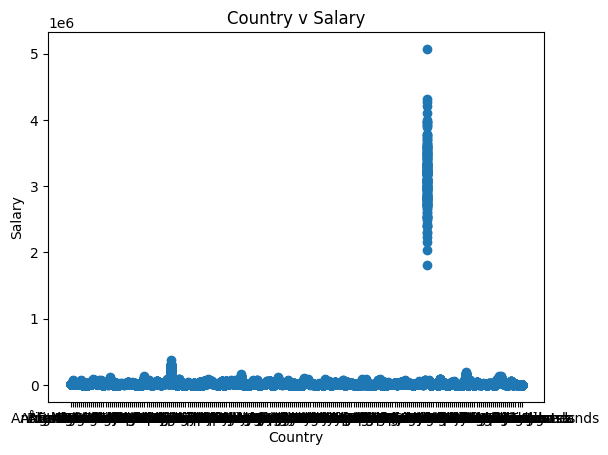

In [526]:
plt.title("Country v Salary")
plt.xlabel("Country")
plt.ylabel("Salary")
plt.scatter(jobsData_Clean.Country, jobsData_Clean.Salary)
plt.plot(np.unique(jobsData_Clean.Country), np.poly1d(np.polyfit(jobsData_Clean.Country, jobsData_Clean.Salary, 1))(np.unique(jobsData_Clean.Country)))

TypeError: can only concatenate str (not "float") to str

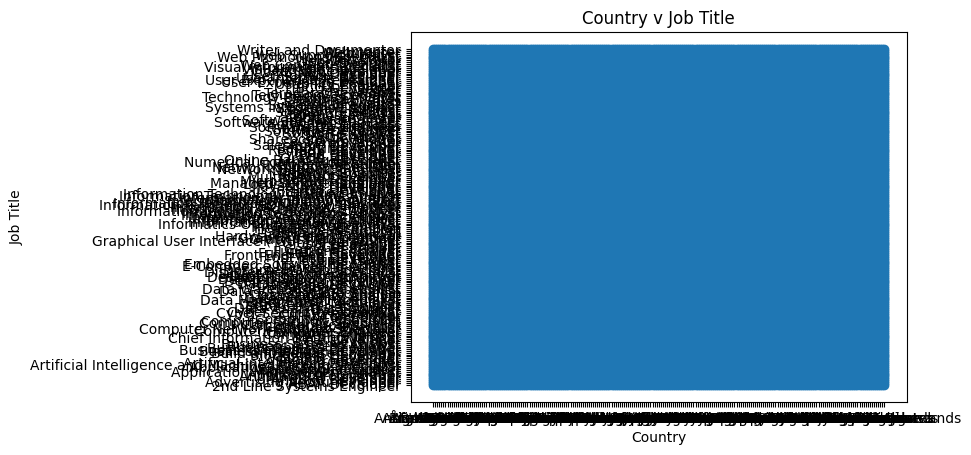

In [ ]:
plt.title("Country v Job Title")
plt.xlabel("Country")
plt.ylabel("Job Title")
plt.scatter(jobsData_Clean.Country, jobsData_Clean.Job_Title)
plt.plot(np.unique(jobsData_Clean.Country), np.poly1d(np.polyfit(jobsData_Clean.Country, jobsData_Clean.Job_Title, 1))(np.unique(jobsData_Clean.Country)))

<b>Country Data</b>

Purchasing power

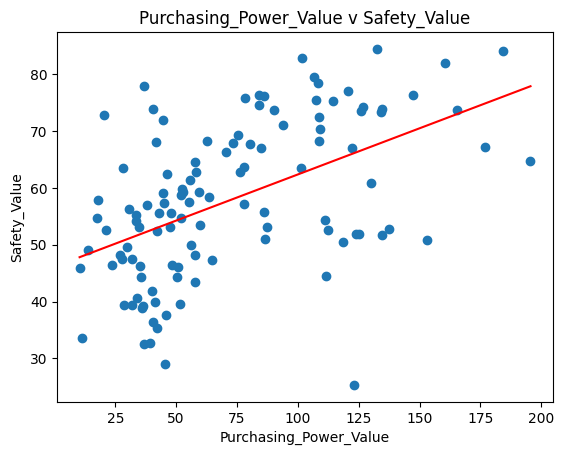

In [533]:
plt.title("Purchasing_Power_Value v Safety_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Safety_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Safety_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Safety_Value, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

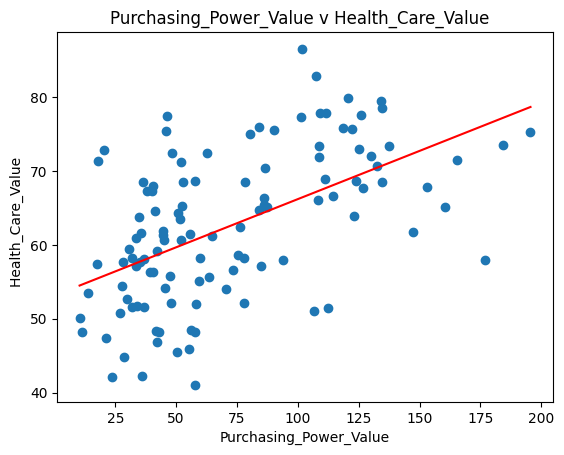

In [534]:
plt.title("Purchasing_Power_Value v Health_Care_Value  ")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Health_Care_Value  ")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Health_Care_Value  )
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Health_Care_Value  , 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

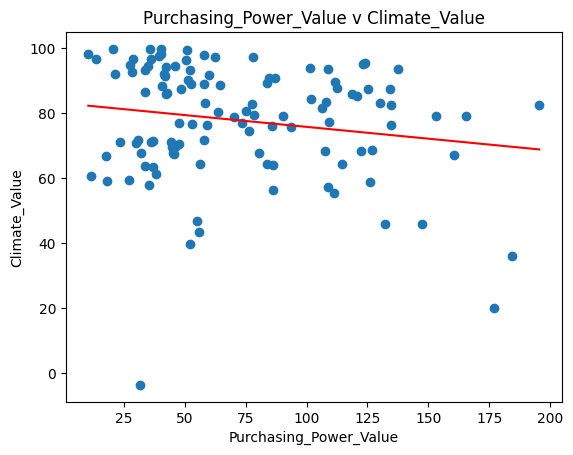

In [535]:
plt.title("Purchasing_Power_Value v Climate_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Climate_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Climate_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Climate_Value  , 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

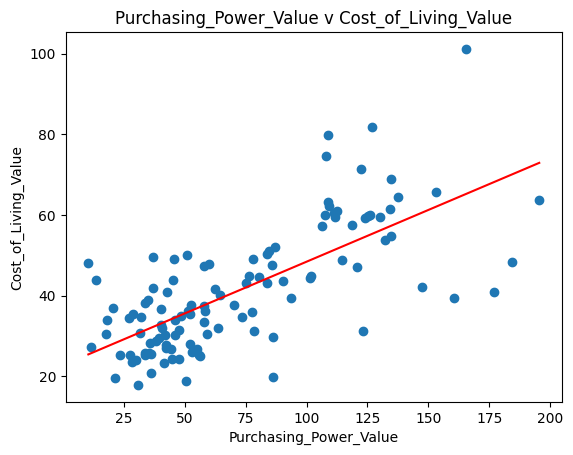

In [536]:
plt.title("Purchasing_Power_Value v Cost_of_Living_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Cost_of_Living_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Cost_of_Living_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Cost_of_Living_Value, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

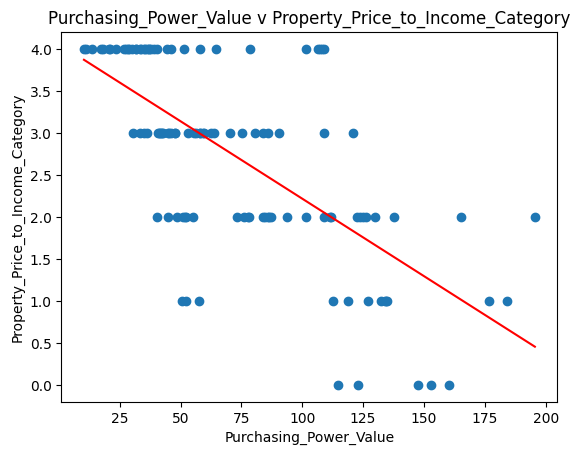

In [542]:
plt.title("Purchasing_Power_Value v Property_Price_to_Income_Category")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Property_Price_to_Income_Category")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Property_Price_to_Income_Category)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Property_Price_to_Income_Category, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

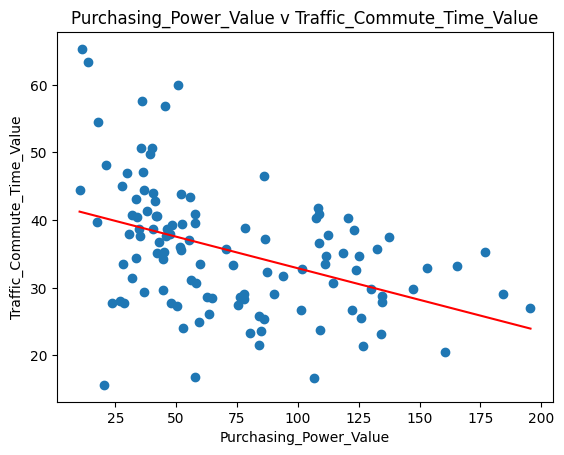

In [543]:
plt.title("Purchasing_Power_Value v Traffic_Commute_Time_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Traffic_Commute_Time_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Traffic_Commute_Time_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Traffic_Commute_Time_Value, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

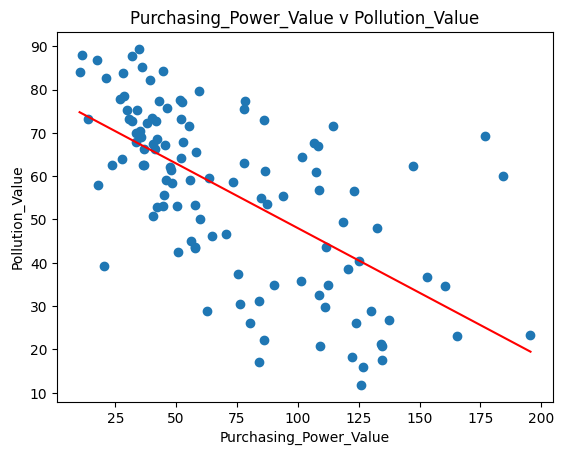

In [544]:
plt.title("Purchasing_Power_Value v Pollution_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

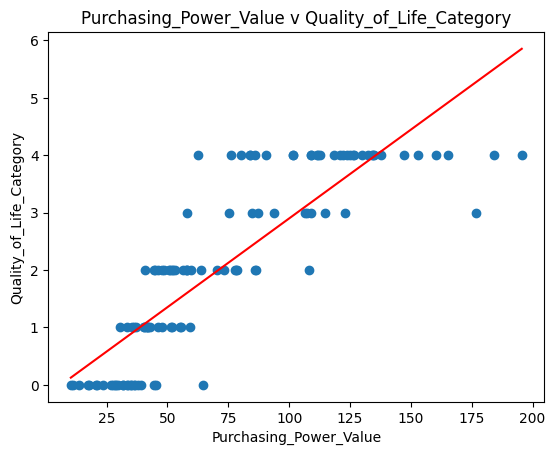

In [546]:
plt.title("Purchasing_Power_Value v Quality_of_Life_Category")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Quality_of_Life_Category")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Quality_of_Life_Category)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

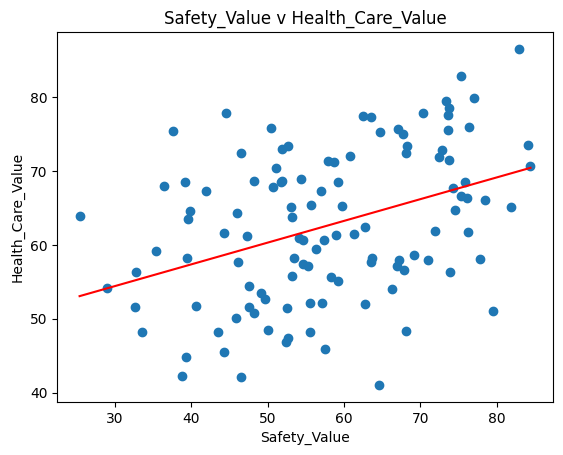

In [547]:
plt.title("Safety_Value v Health_Care_Value")
plt.xlabel("Safety_Value")
plt.ylabel("Health_Care_Value")
plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Health_Care_Value)
plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Health_Care_Value, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

5.Normalization 

6.Weighting and Aggregation 

7.Link to other indicators (dont need to do)

8.Visualization of Results 

9.Version control 

10.Deliverables